In [15]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, 
    Conv2D, 
    Dense, 
    Flatten, 
    Dropout
)

In [5]:
# Load int the data

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train_shape:", x_train.shape)

x_train_shape: (60000, 28, 28)


In [6]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [9]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [10]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 35s 18ms/step - loss: 0.5210 - accuracy: 0.8065 - val_loss: 0.4058 - val_accuracy: 0.8440
Epoch 2/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3610 - accuracy: 0.8642 - val_loss: 0.3588 - val_accuracy: 0.8598
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3119 - accuracy: 0.8818 - val_loss: 0.3127 - val_accuracy: 0.8849
Epoch 4/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2782 - accuracy: 0.8953 - val_loss: 0.3059 - val_accuracy: 0.8881
Epoch 5/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2520 - accuracy: 0.9064 - val_loss: 0.2951 - val_accuracy: 0.8941
Epoch 6/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2286 - accuracy: 0.9138 - val_loss: 0.3077 - val_accuracy: 0.8946
Epoch 7/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2109 - accuracy: 0.9203 - val_loss: 0.2943 -

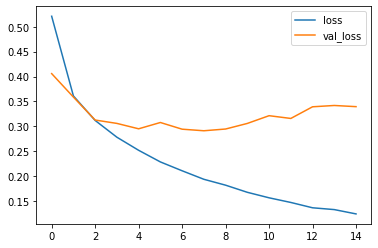

In [11]:
# Plot loss per interation
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

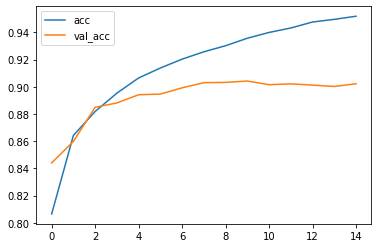

In [12]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 3s 9ms/step
Confusion matrix, without normalization
[[864   1  21  23   1   4  81   0   5   0]
 [  3 979   1  10   2   0   3   0   2   0]
 [ 22   2 862   8  62   0  44   0   0   0]
 [ 12  10  15 907  31   1  22   0   2   0]
 [  0   0  57  21 866   1  55   0   0   0]
 [  0   0   0   0   0 983   0  13   0   4]
 [109   2  73  28 101   0 681   0   6   0]
 [  0   0   0   0   0  25   0 947   0  28]
 [  2   0   5   4   4   2   9   1 972   1]
 [  0   0   0   0   0   9   1  29   0 961]]


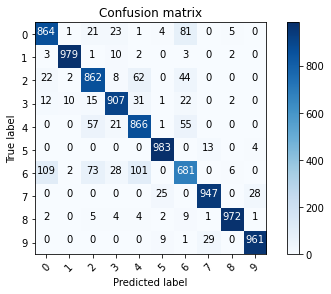

In [16]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`
  """
  if normalize:
    cm = cm.astype("foat") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = ".2f" if normalize else "d"
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# do these result make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.



In [24]:
# Label mapping
labels = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat', 
    'Sandal', 
    'Shirt', 
    'Sneaker', 
    'Bag',
    'Ankle boot'
]

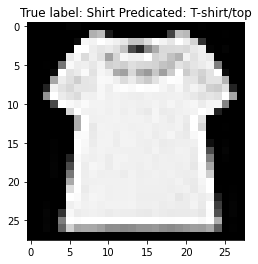

In [31]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
_ = plt.title("True label: %s Predicated: %s" % (labels[y_test[i]], labels[p_test[i]]))